In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc

In [2]:
df=pd.read_csv("parkinsons.data",index_col="name")
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, phon_R01_S01_1 to phon_R01_S50_6
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.duplicated().sum()

0

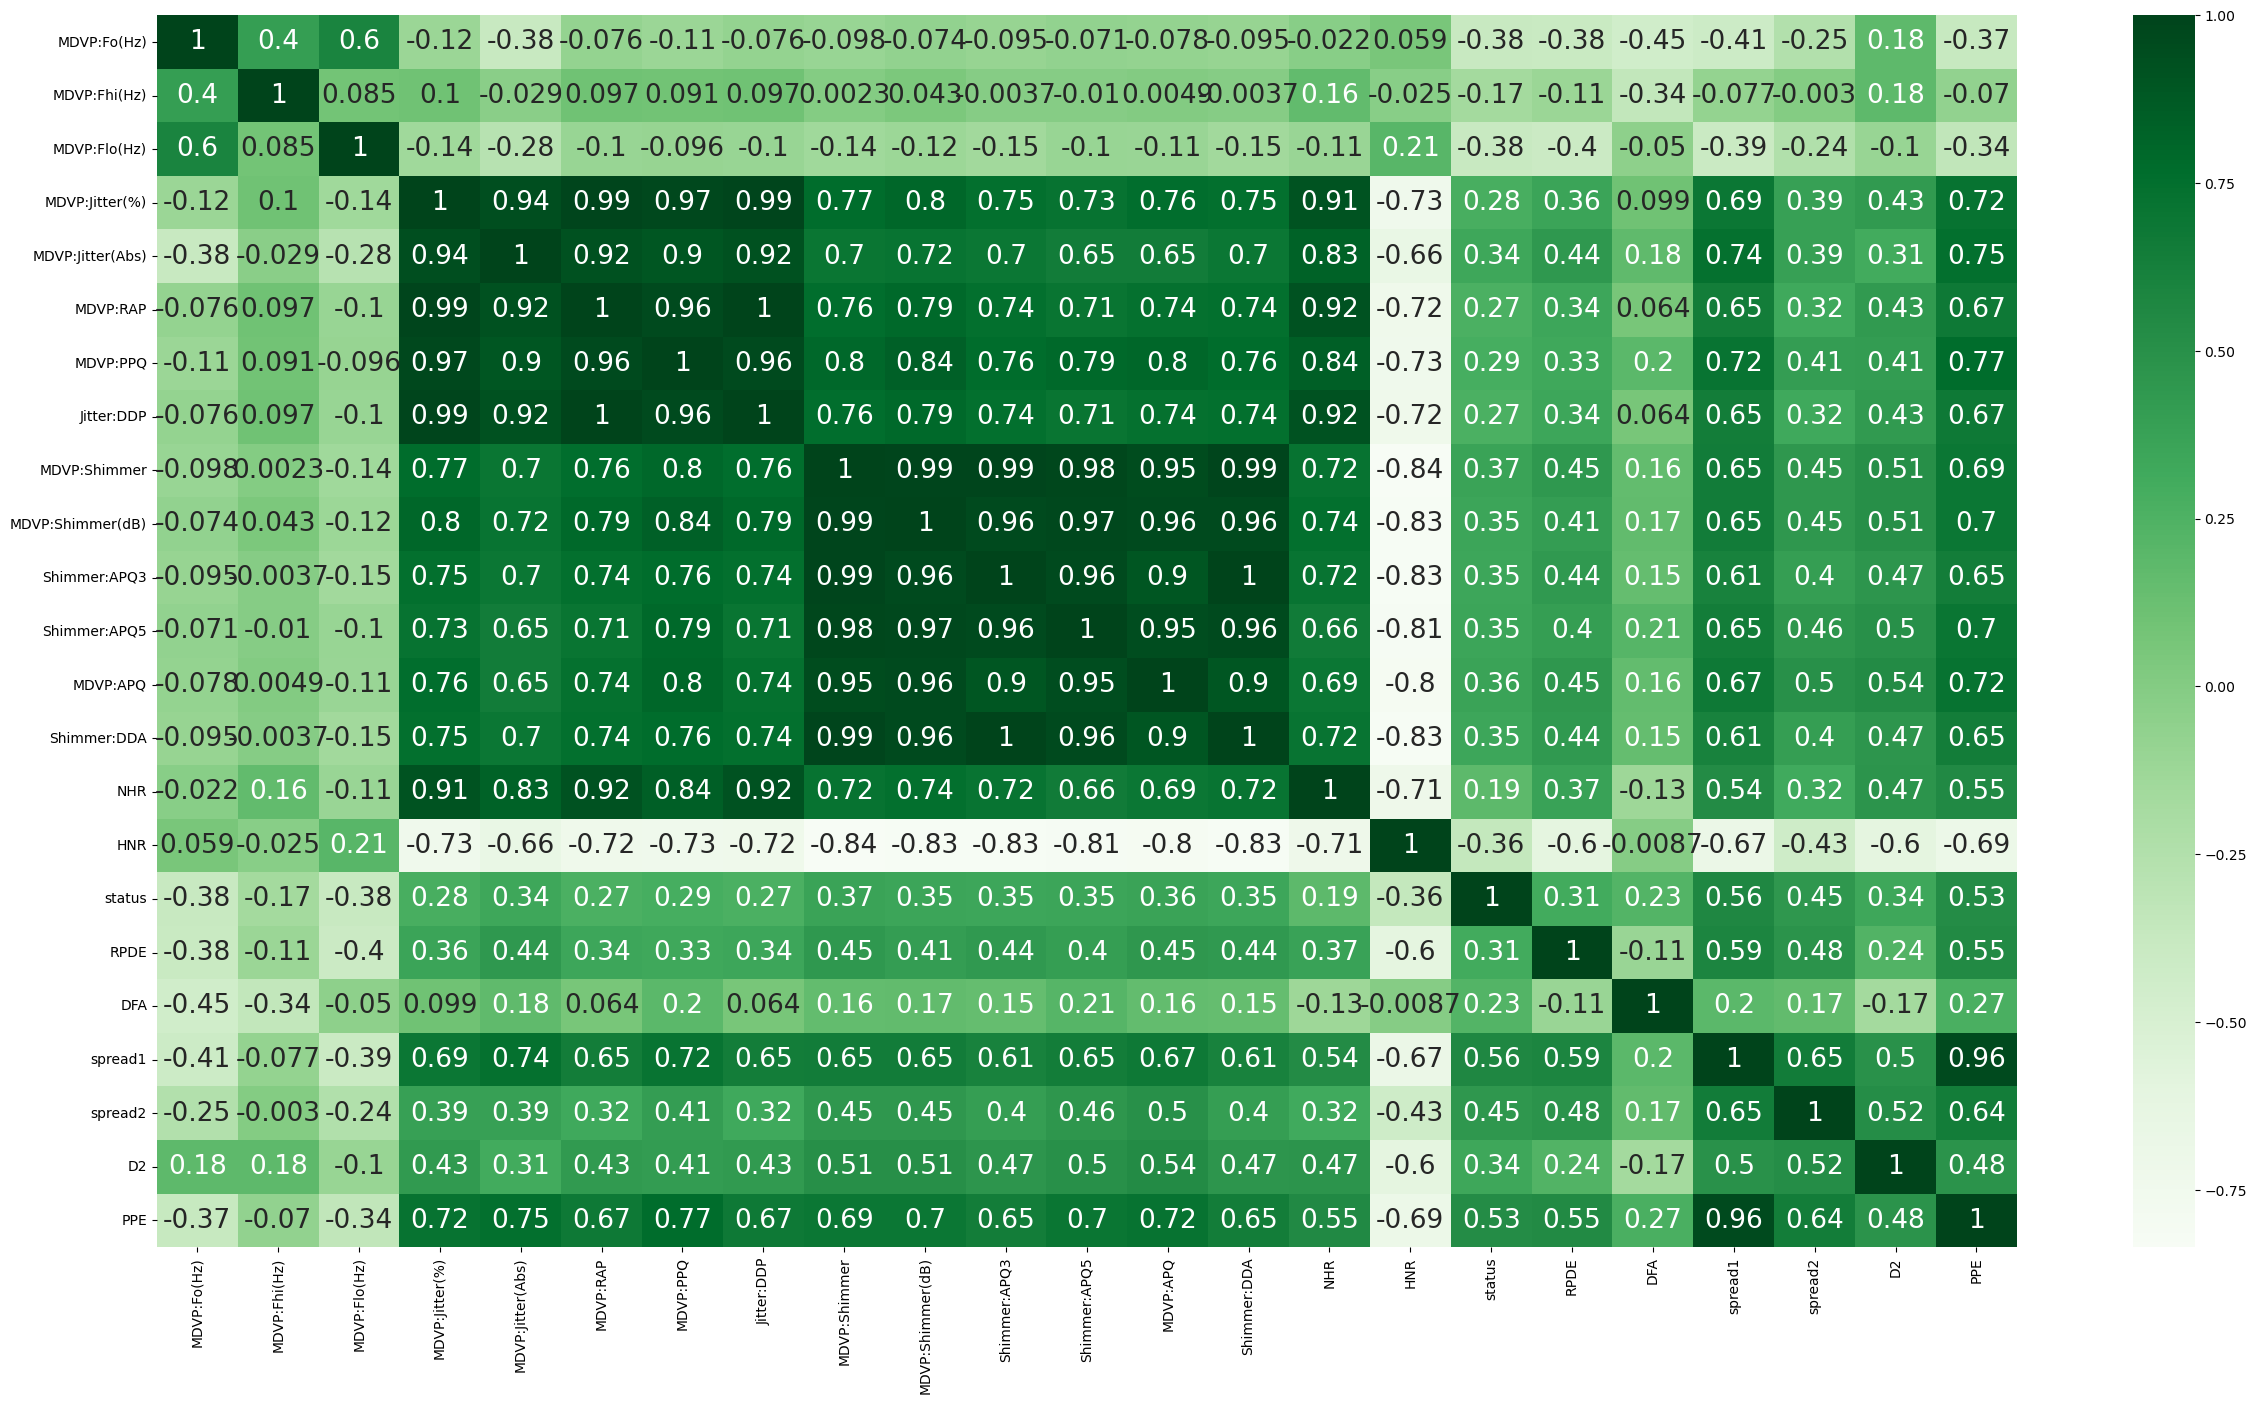

In [6]:
plt.figure(figsize=(30,16))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens',annot_kws={'size':19})
plt.show()

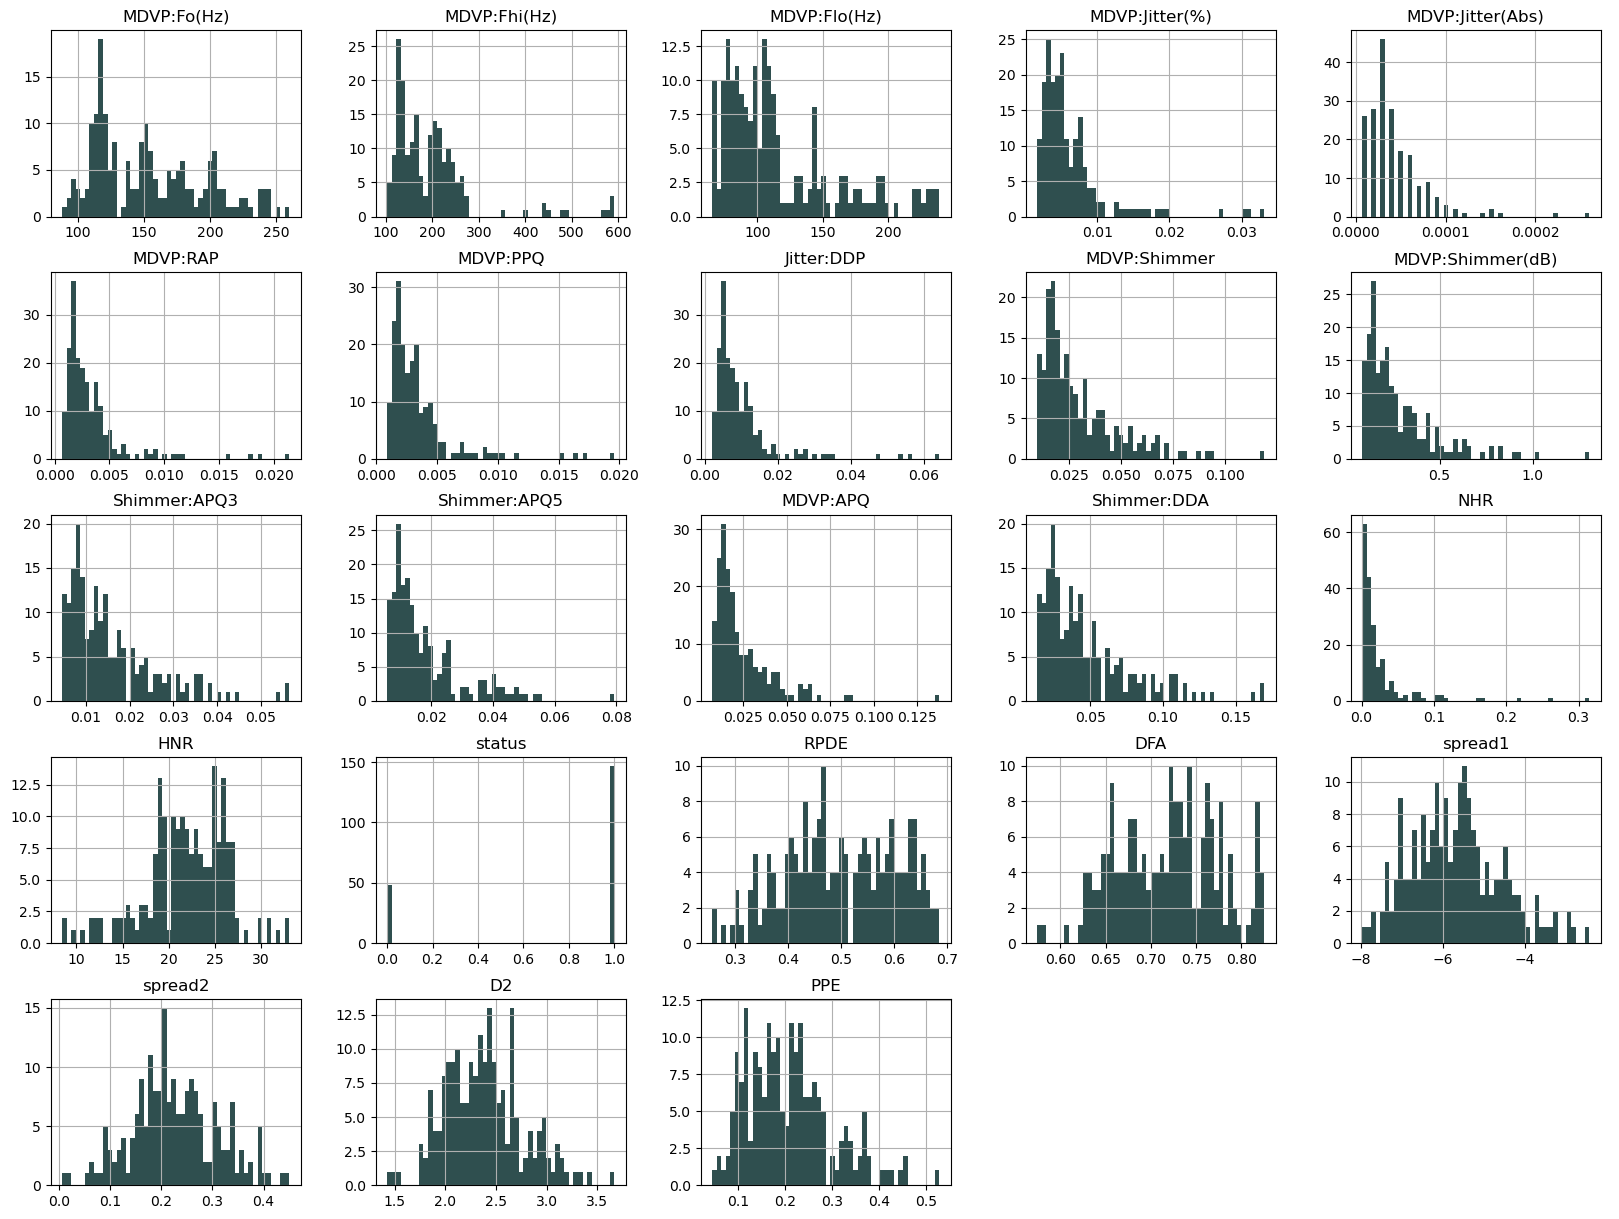

In [7]:
df.hist(bins=50, figsize =(20,15), color = 'darkslategrey')
plt.show(block=False)

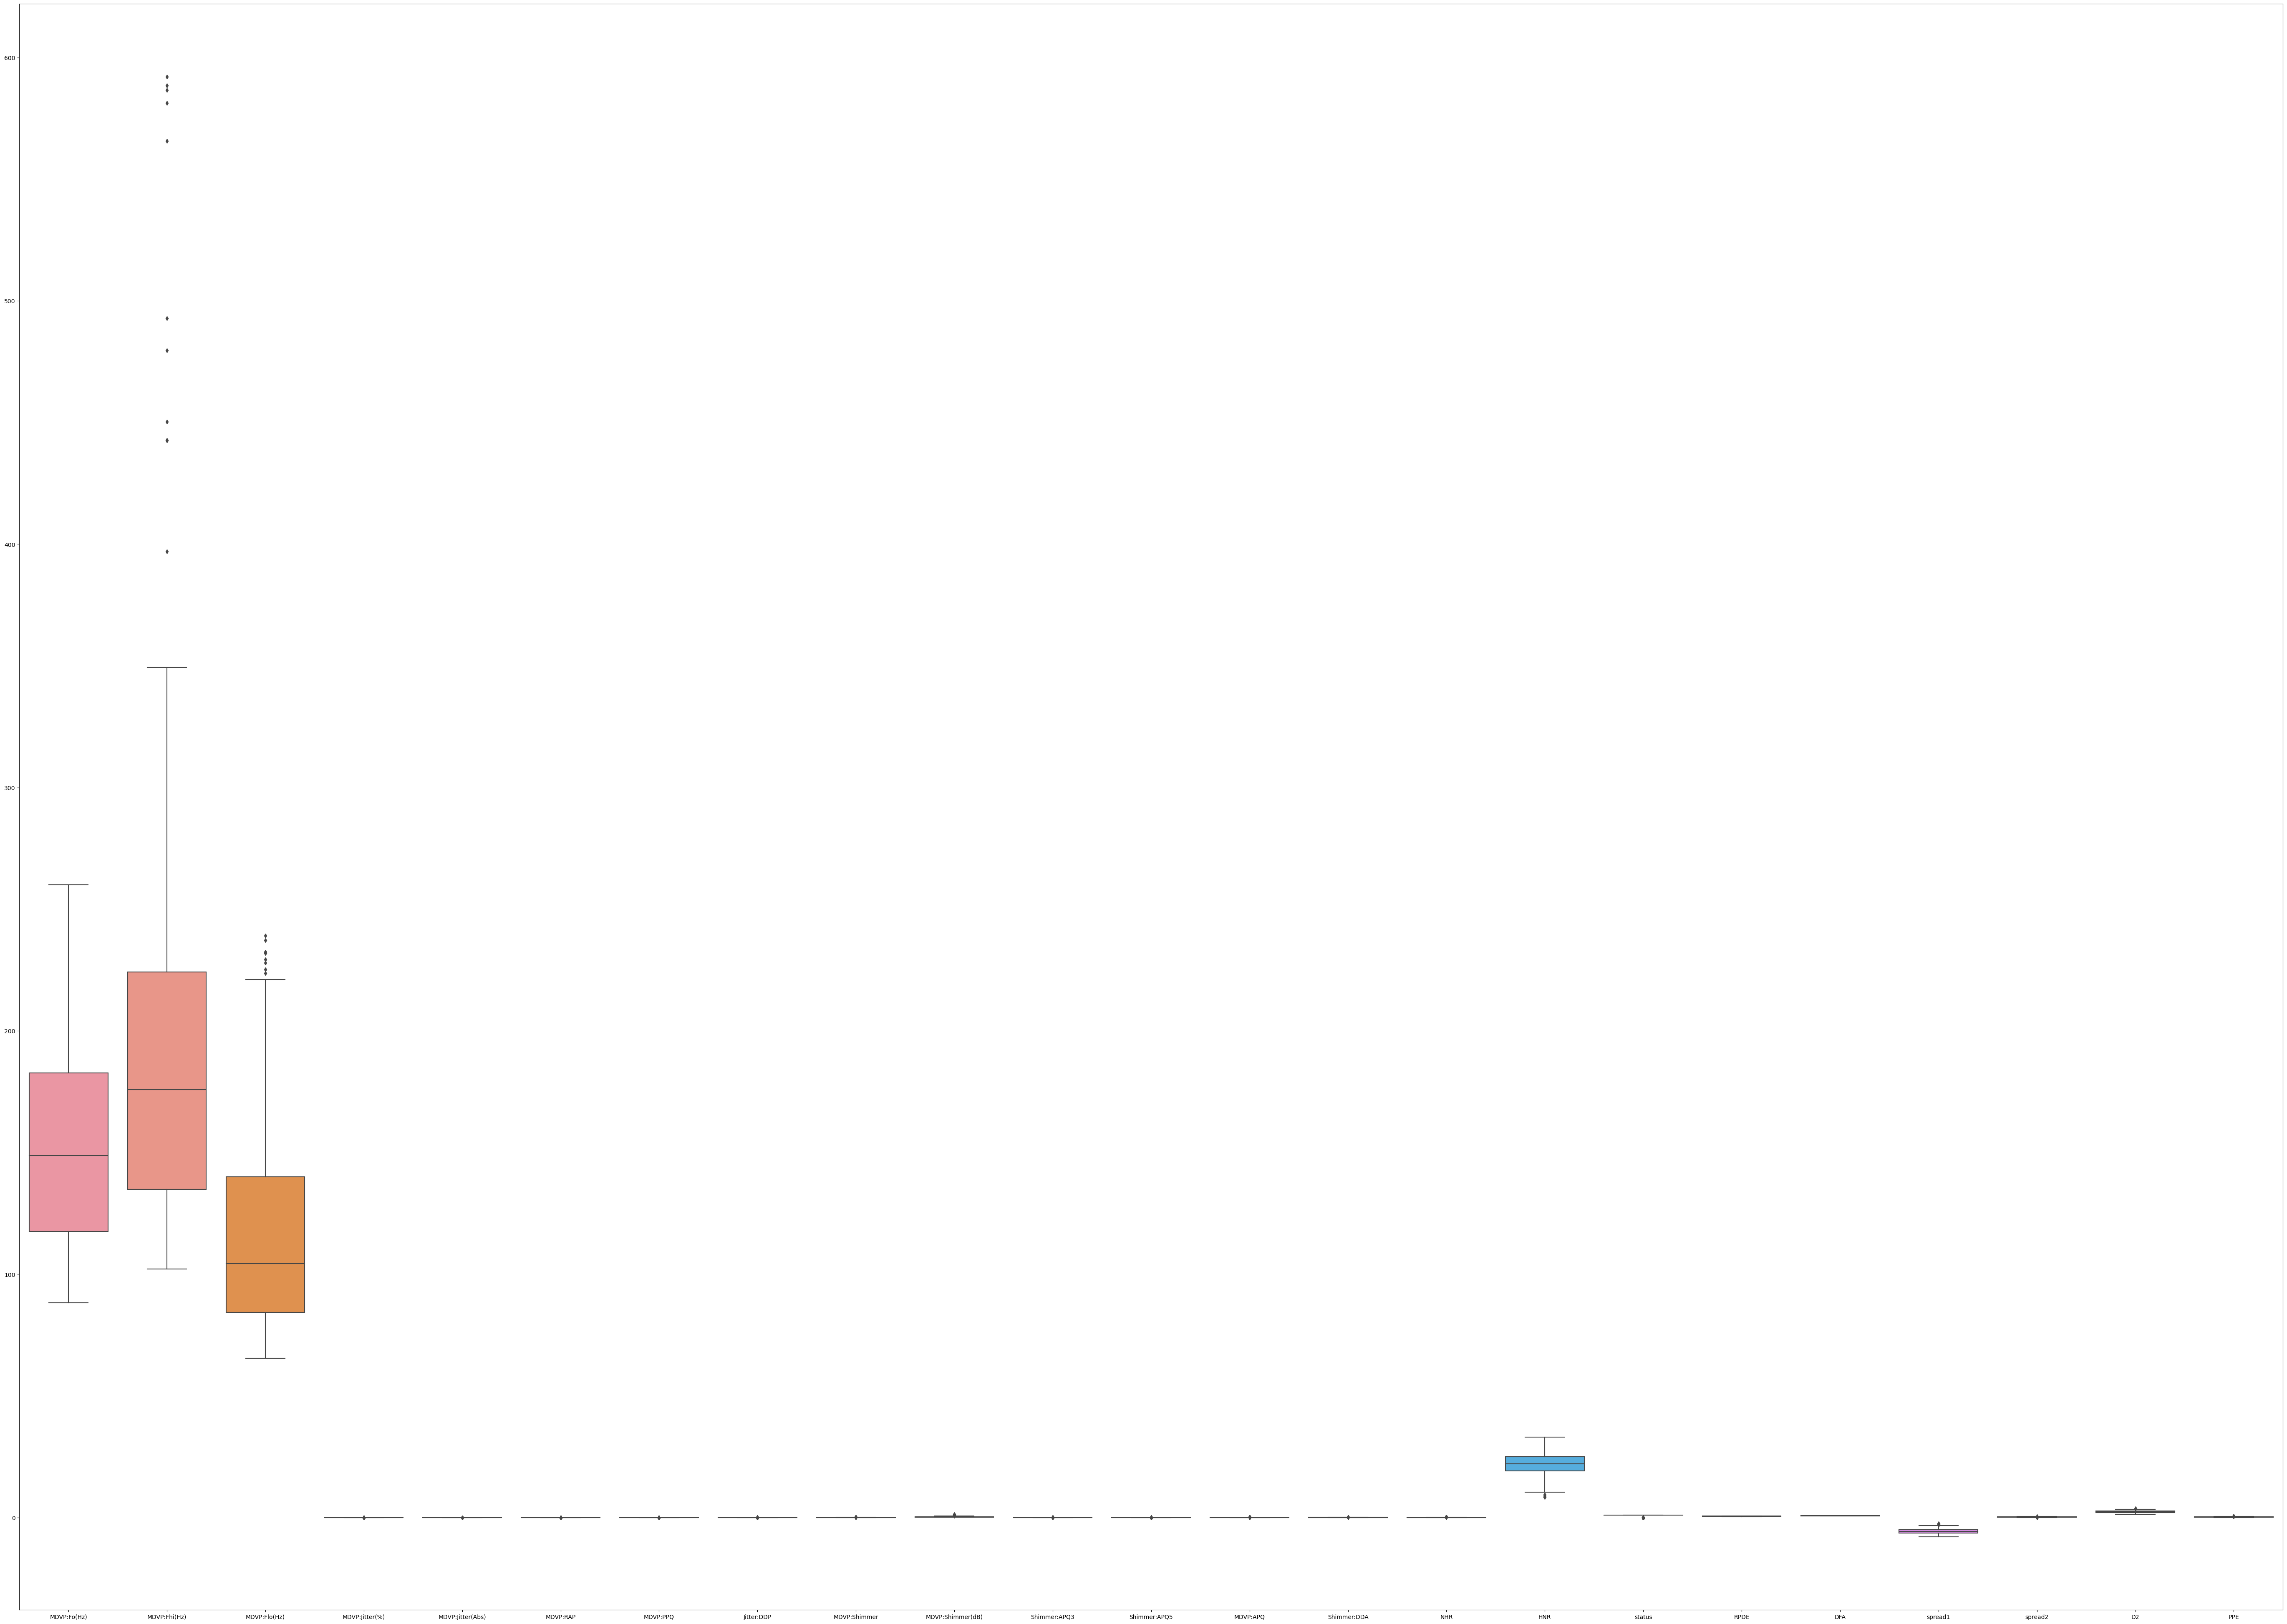

In [8]:
plt.figure(figsize=(70,50))
sns.boxplot(data= df)
plt.show()

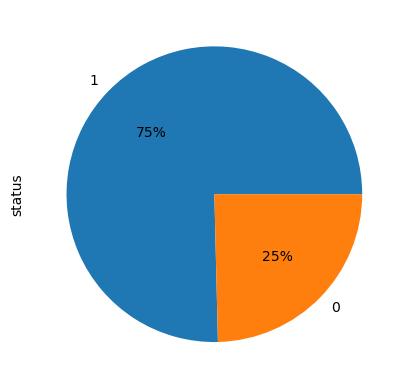

In [9]:
df['status'].value_counts().plot(kind='pie',autopct="%1.0f%%")
plt.show()

In [10]:
x=df.drop('status',axis=1)
y=df["status"]

In [11]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [12]:
y

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
                 ..
phon_R01_S50_2    0
phon_R01_S50_3    0
phon_R01_S50_4    0
phon_R01_S50_5    0
phon_R01_S50_6    0
Name: status, Length: 195, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE
smote_sampler=SMOTE(random_state=42)
x_smote,y_smote=smote_sampler.fit_resample(x, y)
smote_data=pd.concat([x_smote,y_smote],axis=1)

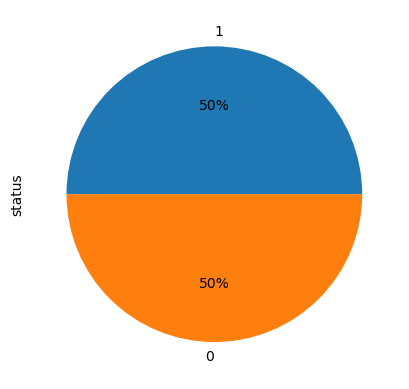

In [14]:
smote_data['status'].value_counts().plot(kind='pie',autopct="%1.0f%%")
plt.show()

In [15]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
X_smote_train,X_smote_test,y_smote_train,y_smote_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

# Normalizing


In [17]:
minmax=MinMaxScaler()

In [18]:
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [19]:
X_smote_train_scaled = minmax.fit_transform(X_smote_train)
X_smote_test_scaled = minmax.transform(X_smote_test)

In [20]:
logreg=LogisticRegression()
param_dist={'C':[0.1, 1, 10],'solver':['liblinear','newton-cg','sag','saga','lbfgs']}
cv_logreg= GridSearchCV(logreg,cv = 5,param_grid= param_dist,n_jobs = -1,verbose=1)
cv_logreg.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'saga',
                                    'lbfgs']},
             verbose=1)

In [21]:
cv_logreg.best_params_

{'C': 10, 'solver': 'newton-cg'}

In [22]:
logreg=cv_logreg.best_estimator_
print("Train Accuracy :", logreg.score(X_train_scaled,y_train))
print("Test Accuracy :", logreg.score(X_test_scaled,y_test))

Train Accuracy : 0.8653846153846154
Test Accuracy : 0.8974358974358975


In [23]:
pred_train_logreg= logreg.predict(X_train_scaled)
pred_test_logreg=logreg.predict(X_test_scaled)

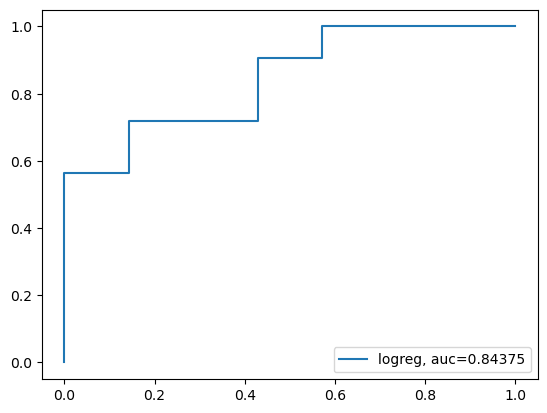

In [24]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [25]:
conf_matrix=confusion_matrix(y_test,pred_test_logreg)
conf_matrix

array([[ 3,  4],
       [ 0, 32]], dtype=int64)

In [26]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " Logistic Regrerssion ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_logreg),
                 'Precision Score': metrics.precision_score(y_test, pred_test_logreg),
                 'Recall Score': metrics.recall_score(y_test, pred_test_logreg),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_logreg),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_logreg)})

model_logreg_report = model_report.append(tmp1, ignore_index = True)
model_logreg_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logistic Regrerssion,0.714286,0.888889,1.0,0.941176,0.897436


In [27]:
cv_logreg.fit(X_smote_train_scaled,y_smote_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'saga',
                                    'lbfgs']},
             verbose=1)

In [28]:
cv_logreg.best_params_

{'C': 10, 'solver': 'sag'}

In [29]:
logreg=cv_logreg.best_estimator_
print("Train Accuracy :", logreg.score(X_smote_train_scaled,y_smote_train))
print("Test Accuracy :", logreg.score(X_smote_test_scaled,y_smote_test))

Train Accuracy : 0.7957446808510639
Test Accuracy : 0.864406779661017


In [30]:
pred_train_logreg= logreg.predict(X_smote_train_scaled)
pred_test_logreg=logreg.predict(X_smote_test_scaled)

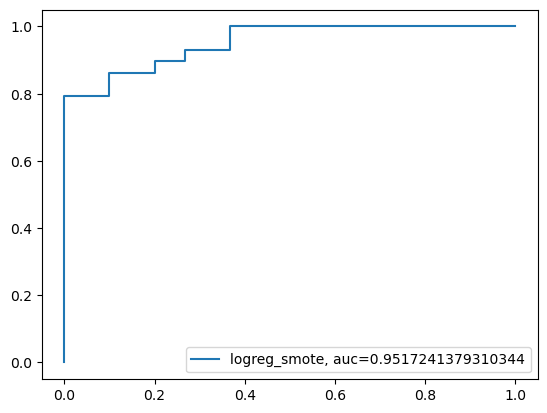

In [31]:
y_pred_proba = logreg.predict_proba(X_smote_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_smote_test, y_pred_proba)
auc = metrics.roc_auc_score(y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="logreg_smote, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
conf_matrix=confusion_matrix(y_smote_test,pred_test_logreg)
conf_matrix

array([[26,  4],
       [ 4, 25]], dtype=int64)

In [34]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " Logistic Regrerssion with smote ",
                 'ROC Score' : metrics.roc_auc_score(y_smote_test, pred_test_logreg),
                 'Precision Score': metrics.precision_score(y_smote_test, pred_test_logreg),
                 'Recall Score': metrics.recall_score(y_smote_test, pred_test_logreg),
                 'F1 Score' : metrics.f1_score(y_smote_test, pred_test_logreg),
                 'Accuracy Score': metrics.accuracy_score(y_smote_test, pred_test_logreg)})

model_logregsmote_report = model_report.append(tmp1, ignore_index = True)
model_logregsmote_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logistic Regrerssion with smote,0.864368,0.862069,0.862069,0.862069,0.864407


In [35]:
svc=SVC(probability=True)
param_dist={'C':[1,10],"gamma":[1,10],"kernel":["rbf","linear"]}
cv_svc= GridSearchCV(svc,cv = 5,param_grid= param_dist,n_jobs = -1,verbose=1)
cv_svc.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [1, 10],
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [36]:
cv_svc.best_params_

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}

In [37]:
svc=cv_svc.best_estimator_
print("Train Accuracy :", svc.score(X_train_scaled,y_train))
print("Test Accuracy :", svc.score(X_test_scaled,y_test))

Train Accuracy : 1.0
Test Accuracy : 0.9230769230769231


In [38]:
pred_train_svc= svc.predict(X_train_scaled)
pred_test_svc=svc.predict(X_test_scaled)

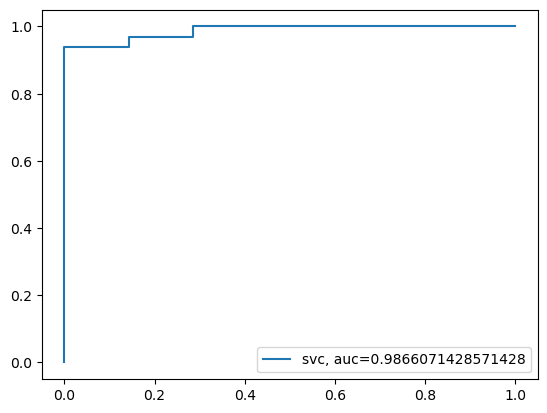

In [39]:
y_pred_proba = svc.predict_proba(X_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="svc, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [40]:
conf_matrix=confusion_matrix(y_test,pred_test_svc)
conf_matrix

array([[ 4,  3],
       [ 0, 32]], dtype=int64)

In [41]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " SVC ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_svc),
                 'Precision Score': metrics.precision_score(y_test, pred_test_svc),
                 'Recall Score': metrics.recall_score(y_test, pred_test_svc),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_svc),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_svc)})

model_svc_report = model_report.append(tmp1, ignore_index = True)
model_svc_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,SVC,0.785714,0.914286,1.0,0.955224,0.923077


In [42]:
cv_svc.fit(X_smote_train_scaled,y_smote_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [1, 10],
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [43]:
cv_svc.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'rbf'}

In [44]:
svc=cv_svc.best_estimator_
print("Train Accuracy :", svc.score(X_smote_train_scaled,y_smote_train))
print("Test Accuracy :", svc.score(X_smote_test_scaled,y_smote_test))

Train Accuracy : 0.9957446808510638
Test Accuracy : 1.0


In [45]:
pred_train_svc= svc.predict(X_smote_train_scaled)
pred_test_svc=svc.predict(X_smote_test_scaled)

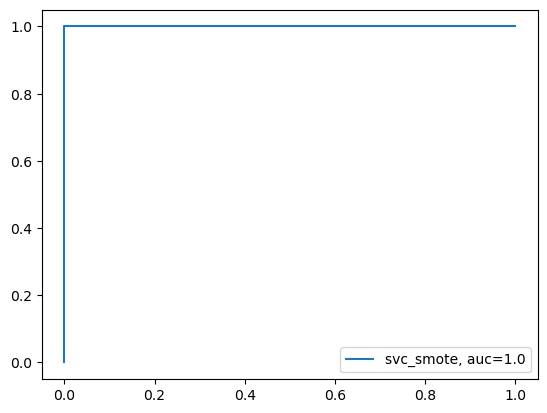

In [47]:
y_pred_proba = svc.predict_proba(X_smote_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_smote_test, y_pred_proba)
auc = metrics.roc_auc_score(y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="svc_smote, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
conf_matrix=confusion_matrix(y_smote_test,pred_test_svc)
conf_matrix

array([[30,  0],
       [ 0, 29]], dtype=int64)

In [49]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " SVC with smote ",
                 'ROC Score' : metrics.roc_auc_score(y_smote_test, pred_test_svc),
                 'Precision Score': metrics.precision_score(y_smote_test, pred_test_svc),
                 'Recall Score': metrics.recall_score(y_smote_test, pred_test_svc),
                 'F1 Score' : metrics.f1_score(y_smote_test, pred_test_svc),
                 'Accuracy Score': metrics.accuracy_score(y_smote_test, pred_test_svc)})

model_svcsmote_report = model_report.append(tmp1, ignore_index = True)
model_svcsmote_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,SVC with smote,1.0,1.0,1.0,1.0,1.0


In [50]:
dt=DecisionTreeClassifier()
param_dist={"criterion":["gini", "entropy", "log_loss"],"splitter":["best", "random"]}
cv_dt= GridSearchCV(dt,cv = 5,param_grid= param_dist,n_jobs = -1,verbose=1)
cv_dt.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [52]:
cv_dt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [53]:
dt=cv_dt.best_estimator_
print("Train Accuracy :", dt.score(X_train_scaled,y_train))
print("Test Accuracy :", dt.score(X_test_scaled,y_test))

Train Accuracy : 1.0
Test Accuracy : 0.9230769230769231


In [54]:
pred_train_dt= dt.predict(X_train_scaled)
pred_test_dt=dt.predict(X_test_scaled)

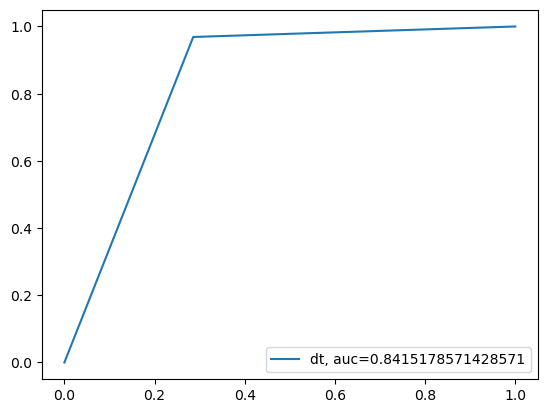

In [55]:
y_pred_proba = dt.predict_proba(X_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="dt, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [56]:
conf_matrix=confusion_matrix(y_test,pred_test_dt)
conf_matrix

array([[ 5,  2],
       [ 1, 31]], dtype=int64)

In [57]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " DT ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_dt),
                 'Precision Score': metrics.precision_score(y_test, pred_test_dt),
                 'Recall Score': metrics.recall_score(y_test, pred_test_dt),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_dt),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_dt)})

model_dt_report = model_report.append(tmp1, ignore_index = True)
model_dt_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,DT,0.841518,0.939394,0.96875,0.953846,0.923077


In [58]:
cv_dt.fit(X_smote_train_scaled,y_smote_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [59]:
cv_dt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [60]:
dt=cv_dt.best_estimator_
print("Train Accuracy :", dt.score(X_smote_train_scaled,y_smote_train))
print("Test Accuracy :", dt.score(X_smote_test_scaled,y_smote_test))

Train Accuracy : 1.0
Test Accuracy : 1.0


In [61]:
pred_train_dt= dt.predict(X_smote_train_scaled)
pred_test_dt=dt.predict(X_smote_test_scaled)

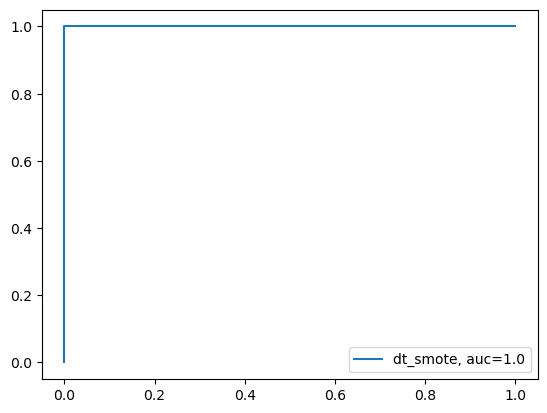

In [62]:
y_pred_proba = dt.predict_proba(X_smote_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_smote_test, y_pred_proba)
auc = metrics.roc_auc_score(y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="dt_smote, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [63]:
conf_matrix=confusion_matrix(y_smote_test,pred_test_dt)
conf_matrix

array([[30,  0],
       [ 0, 29]], dtype=int64)

In [64]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " dt with smote ",
                 'ROC Score' : metrics.roc_auc_score(y_smote_test, pred_test_dt),
                 'Precision Score': metrics.precision_score(y_smote_test, pred_test_dt),
                 'Recall Score': metrics.recall_score(y_smote_test, pred_test_dt),
                 'F1 Score' : metrics.f1_score(y_smote_test, pred_test_dt),
                 'Accuracy Score': metrics.accuracy_score(y_smote_test, pred_test_dt)})

model_dtsmote_report = model_report.append(tmp1, ignore_index = True)
model_dtsmote_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,dt with smote,1.0,1.0,1.0,1.0,1.0


In [65]:
knn=KNeighborsClassifier()
param_dist={"n_neighbors":[2,3,5,7,9],
            "metric":["euclidean","manhattan","minkowski"],
            "weights":["uniform","distance"]}
cv_knn= GridSearchCV(knn,cv = 5,param_grid= param_dist,n_jobs = -1,verbose=1)
cv_knn.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [2, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [66]:
cv_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}

In [67]:
knn=cv_knn.best_estimator_
print("Train Accuracy :", knn.score(X_train_scaled,y_train))
print("Test Accuracy :", knn.score(X_test_scaled,y_test))

Train Accuracy : 1.0
Test Accuracy : 0.9487179487179487


In [68]:
pred_train_knn= knn.predict(X_train_scaled)
pred_test_knn=knn.predict(X_test_scaled)

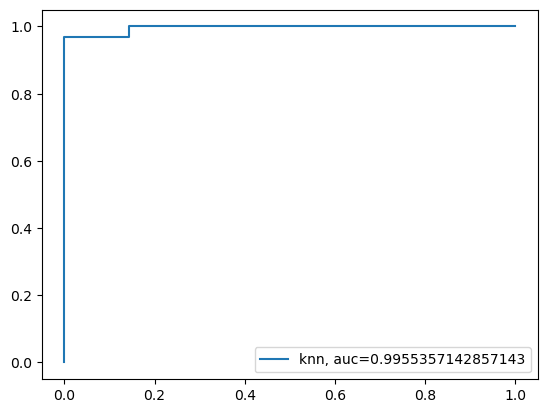

In [69]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="knn, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [70]:
conf_matrix=confusion_matrix(y_test,pred_test_knn)
conf_matrix

array([[ 7,  0],
       [ 2, 30]], dtype=int64)

In [71]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " KNN ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_knn),
                 'Precision Score': metrics.precision_score(y_test, pred_test_knn),
                 'Recall Score': metrics.recall_score(y_test, pred_test_knn),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_knn),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_knn)})

model_knn_report = model_report.append(tmp1, ignore_index = True)
model_knn_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,KNN,0.96875,1.0,0.9375,0.967742,0.948718


In [72]:
cv_knn.fit(X_smote_train_scaled,y_smote_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [2, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [73]:
cv_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}

In [74]:
knn=cv_knn.best_estimator_
print("Train Accuracy :", knn.score(X_smote_train_scaled,y_smote_train))
print("Test Accuracy :", knn.score(X_smote_test_scaled,y_smote_test))

Train Accuracy : 1.0
Test Accuracy : 0.9830508474576272


In [75]:
pred_train_knn= knn.predict(X_smote_train_scaled)
pred_test_knn=knn.predict(X_smote_test_scaled)

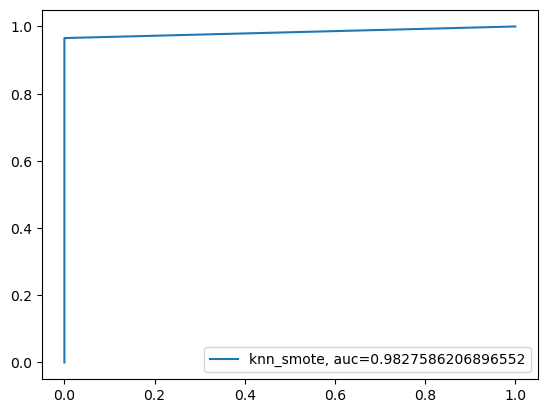

In [76]:
y_pred_proba = knn.predict_proba(X_smote_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_smote_test, y_pred_proba)
auc = metrics.roc_auc_score(y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="knn_smote, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [77]:
conf_matrix=confusion_matrix(y_smote_test,pred_test_knn)
conf_matrix

array([[30,  0],
       [ 1, 28]], dtype=int64)

In [78]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " knn with smote ",
                 'ROC Score' : metrics.roc_auc_score(y_smote_test, pred_test_knn),
                 'Precision Score': metrics.precision_score(y_smote_test, pred_test_knn),
                 'Recall Score': metrics.recall_score(y_smote_test, pred_test_knn),
                 'F1 Score' : metrics.f1_score(y_smote_test, pred_test_knn),
                 'Accuracy Score': metrics.accuracy_score(y_smote_test, pred_test_knn)})

model_knnsmote_report = model_report.append(tmp1, ignore_index = True)
model_knnsmote_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,knn with smote,0.982759,1.0,0.965517,0.982456,0.983051


In [79]:
rf=RandomForestClassifier()
param_dist = {'max_depth':[3,5,7,9],
              'min_samples_split':[10,15,20,25],
              'n_estimators':[25,50,100,150],
              'bootstrap': [True, False],
              'max_features': ['auto', 'log2', None],
              'criterion': ['entropy', 'gini']}
cv_rf= GridSearchCV(rf,cv = 5,param_grid= param_dist,n_jobs = -1,verbose=1)
cv_rf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_split': [10, 15, 20, 25],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=1)

In [80]:
cv_rf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 10,
 'n_estimators': 50}

In [81]:
rf=cv_rf.best_estimator_
print("Train Accuracy :", rf.score(X_train_scaled,y_train))
print("Test Accuracy :", rf.score(X_test_scaled,y_test))

Train Accuracy : 1.0
Test Accuracy : 0.9230769230769231


In [82]:
pred_train_rf= rf.predict(X_train_scaled)
pred_test_rf=rf.predict(X_test_scaled)

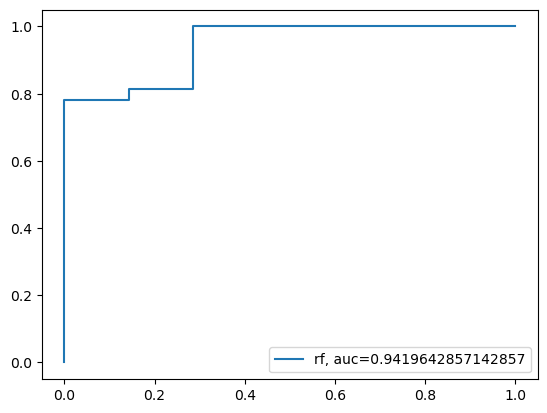

In [83]:
y_pred_proba = rf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="rf, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [84]:
conf_matrix=confusion_matrix(y_test,pred_test_rf)
conf_matrix

array([[ 5,  2],
       [ 1, 31]], dtype=int64)

In [85]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " RF ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_rf),
                 'Precision Score': metrics.precision_score(y_test, pred_test_rf),
                 'Recall Score': metrics.recall_score(y_test, pred_test_rf),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_rf),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_rf)})

model_rf_report = model_report.append(tmp1, ignore_index = True)
model_rf_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,RF,0.841518,0.939394,0.96875,0.953846,0.923077


In [86]:
cv_rf.fit(X_smote_train_scaled,y_smote_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_split': [10, 15, 20, 25],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=1)

In [87]:
cv_rf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'min_samples_split': 10,
 'n_estimators': 25}

In [88]:
rf=cv_rf.best_estimator_
print("Train Accuracy :", rf.score(X_smote_train_scaled,y_smote_train))
print("Test Accuracy :", rf.score(X_smote_test_scaled,y_smote_test))

Train Accuracy : 1.0
Test Accuracy : 0.9830508474576272


In [89]:
pred_train_rf= rf.predict(X_smote_train_scaled)
pred_test_rf=rf.predict(X_smote_test_scaled)

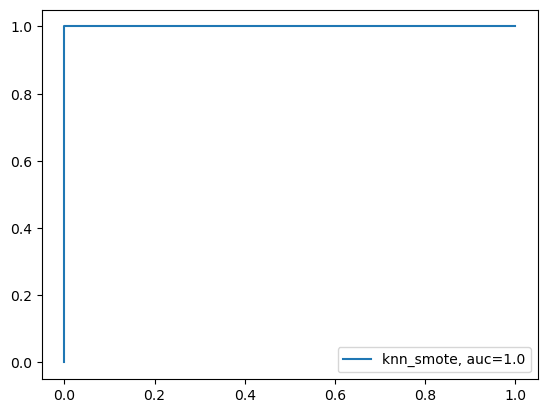

In [90]:
y_pred_proba = rf.predict_proba(X_smote_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_smote_test, y_pred_proba)
auc = metrics.roc_auc_score(y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="knn_smote, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [91]:
conf_matrix=confusion_matrix(y_smote_test,pred_test_rf)
conf_matrix

array([[29,  1],
       [ 0, 29]], dtype=int64)

In [92]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " rf with smote ",
                 'ROC Score' : metrics.roc_auc_score(y_smote_test, pred_test_rf),
                 'Precision Score': metrics.precision_score(y_smote_test, pred_test_rf),
                 'Recall Score': metrics.recall_score(y_smote_test, pred_test_rf),
                 'F1 Score' : metrics.f1_score(y_smote_test, pred_test_rf),
                 'Accuracy Score': metrics.accuracy_score(y_smote_test, pred_test_rf)})

model_rfsmote_report = model_report.append(tmp1, ignore_index = True)
model_rfsmote_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,rf with smote,0.983333,0.966667,1.0,0.983051,0.983051


In [93]:
bg=BaggingClassifier()
param_dist = {'n_estimators':[150,200,250,300],
              'bootstrap': [True, False],
              'max_features': [1,2,3,5,10],
              'max_samples' : [15,20,25,30]}
cv_bg= GridSearchCV(bg,cv = 5,param_grid= param_dist,n_jobs = -1,verbose=1)
cv_bg.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 5, 10],
                         'max_samples': [15, 20, 25, 30],
                         'n_estimators': [150, 200, 250, 300]},
             verbose=1)

In [94]:
cv_bg.best_params_

{'bootstrap': False,
 'max_features': 10,
 'max_samples': 30,
 'n_estimators': 300}

In [95]:
bg=cv_bg.best_estimator_
print("Train Accuracy :", bg.score(X_train_scaled,y_train))
print("Test Accuracy :", bg.score(X_test_scaled,y_test))

Train Accuracy : 0.9294871794871795
Test Accuracy : 0.8974358974358975


In [96]:
pred_train_bg= bg.predict(X_train_scaled)
pred_test_bg=bg.predict(X_test_scaled)

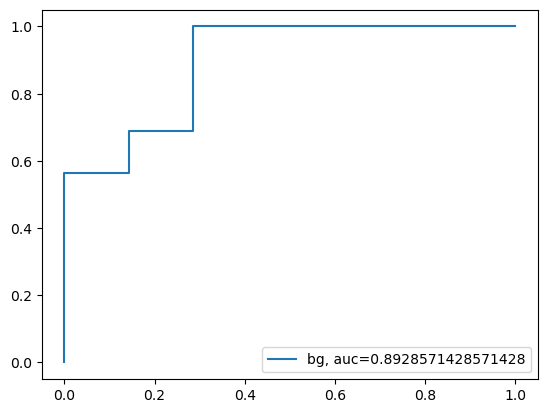

In [97]:
y_pred_proba = bg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="bg, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [98]:
conf_matrix=confusion_matrix(y_test,pred_test_bg)
conf_matrix

array([[ 3,  4],
       [ 0, 32]], dtype=int64)

In [99]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " BG ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_bg),
                 'Precision Score': metrics.precision_score(y_test, pred_test_bg),
                 'Recall Score': metrics.recall_score(y_test, pred_test_bg),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_bg),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_bg)})

model_bg_report = model_report.append(tmp1, ignore_index = True)
model_bg_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,BG,0.714286,0.888889,1.0,0.941176,0.897436


In [100]:
cv_bg.fit(X_smote_train_scaled,y_smote_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 5, 10],
                         'max_samples': [15, 20, 25, 30],
                         'n_estimators': [150, 200, 250, 300]},
             verbose=1)

In [101]:
cv_bg.best_params_

{'bootstrap': True, 'max_features': 10, 'max_samples': 30, 'n_estimators': 150}

In [102]:
bg=cv_bg.best_estimator_
print("Train Accuracy :", bg.score(X_smote_train_scaled,y_smote_train))
print("Test Accuracy :", bg.score(X_smote_test_scaled,y_smote_test))

Train Accuracy : 0.8808510638297873
Test Accuracy : 0.9322033898305084


In [103]:
pred_train_bg= bg.predict(X_smote_train_scaled)
pred_test_bg=bg.predict(X_smote_test_scaled)

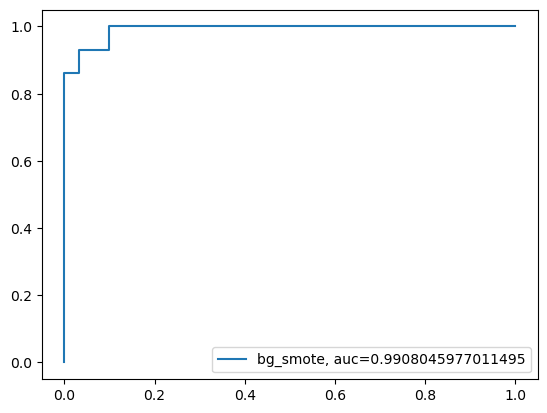

In [104]:
y_pred_proba = bg.predict_proba(X_smote_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_smote_test, y_pred_proba)
auc = metrics.roc_auc_score(y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="bg_smote, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [105]:
conf_matrix=confusion_matrix(y_smote_test,pred_test_bg)
conf_matrix

array([[27,  3],
       [ 1, 28]], dtype=int64)

In [106]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " bg with smote ",
                 'ROC Score' : metrics.roc_auc_score(y_smote_test, pred_test_bg),
                 'Precision Score': metrics.precision_score(y_smote_test, pred_test_bg),
                 'Recall Score': metrics.recall_score(y_smote_test, pred_test_bg),
                 'F1 Score' : metrics.f1_score(y_smote_test, pred_test_bg),
                 'Accuracy Score': metrics.accuracy_score(y_smote_test, pred_test_bg)})

model_bgsmote_report = model_report.append(tmp1, ignore_index = True)
model_bgsmote_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,bg with smote,0.932759,0.903226,0.965517,0.933333,0.932203


In [107]:
ad=AdaBoostClassifier()
param_dist = {'n_estimators':[50,100,150,200],
               'learning_rate':[0.5,0.7,1,1.5,2]}
cv_ad= GridSearchCV(ad,cv = 5,param_grid= param_dist,n_jobs = -1,verbose=1)
cv_ad.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.7, 1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [108]:
cv_ad.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [109]:
ad=cv_ad.best_estimator_
print("Train Accuracy :", ad.score(X_train_scaled,y_train))
print("Test Accuracy :", ad.score(X_test_scaled,y_test))

Train Accuracy : 1.0
Test Accuracy : 0.8717948717948718


In [110]:
pred_train_ad= ad.predict(X_train_scaled)
pred_test_ad=ad.predict(X_test_scaled)

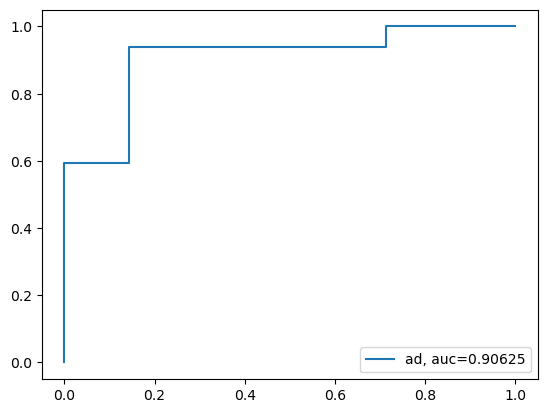

In [111]:
y_pred_proba = ad.predict_proba(X_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ad, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [112]:
conf_matrix=confusion_matrix(y_test,pred_test_ad)
conf_matrix

array([[ 4,  3],
       [ 2, 30]], dtype=int64)

In [113]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " AD ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_ad),
                 'Precision Score': metrics.precision_score(y_test, pred_test_ad),
                 'Recall Score': metrics.recall_score(y_test, pred_test_ad),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_ad),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_ad)})

model_ad_report = model_report.append(tmp1, ignore_index = True)
model_ad_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,AD,0.754464,0.909091,0.9375,0.923077,0.871795


In [114]:
cv_ad.fit(X_smote_train_scaled,y_smote_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.7, 1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [115]:
cv_ad.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [116]:
ad=cv_ad.best_estimator_
print("Train Accuracy :", ad.score(X_smote_train_scaled,y_smote_train))
print("Test Accuracy :", ad.score(X_smote_test_scaled,y_smote_test))

Train Accuracy : 1.0
Test Accuracy : 0.9830508474576272


In [117]:
pred_train_ad= ad.predict(X_smote_train_scaled)
pred_test_ad=ad.predict(X_smote_test_scaled)

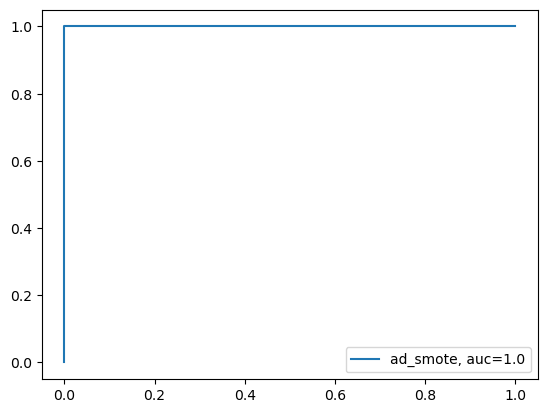

In [118]:
y_pred_proba = ad.predict_proba(X_smote_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_smote_test, y_pred_proba)
auc = metrics.roc_auc_score(y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="ad_smote, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [119]:
conf_matrix=confusion_matrix(y_smote_test,pred_test_ad)
conf_matrix

array([[30,  0],
       [ 1, 28]], dtype=int64)

In [120]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " ad with smote ",
                 'ROC Score' : metrics.roc_auc_score(y_smote_test, pred_test_ad),
                 'Precision Score': metrics.precision_score(y_smote_test, pred_test_ad),
                 'Recall Score': metrics.recall_score(y_smote_test, pred_test_ad),
                 'F1 Score' : metrics.f1_score(y_smote_test, pred_test_ad),
                 'Accuracy Score': metrics.accuracy_score(y_smote_test, pred_test_ad)})

model_adsmote_report = model_report.append(tmp1, ignore_index = True)
model_adsmote_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,ad with smote,0.982759,1.0,0.965517,0.982456,0.983051


In [121]:
gb=GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [122]:
print("Train Accuracy :", gb.score(X_train_scaled,y_train))
print("Test Accuracy :", gb.score(X_test_scaled,y_test))

Train Accuracy : 1.0
Test Accuracy : 0.9487179487179487


In [123]:
pred_train_gb= gb.predict(X_train_scaled)
pred_test_gb=gb.predict(X_test_scaled)

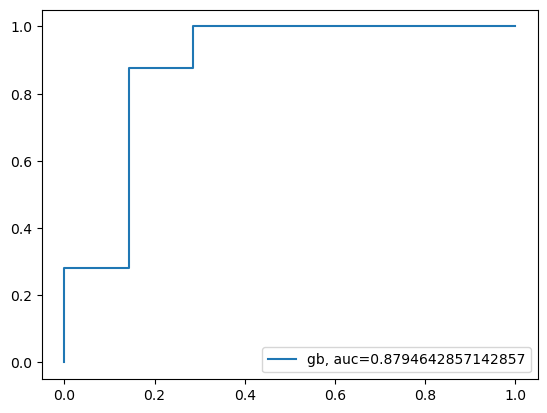

In [124]:
y_pred_proba = gb.predict_proba(X_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="gb, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [125]:
conf_matrix=confusion_matrix(y_test,pred_test_gb)
conf_matrix

array([[ 5,  2],
       [ 0, 32]], dtype=int64)

In [126]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " GB ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_gb),
                 'Precision Score': metrics.precision_score(y_test, pred_test_gb),
                 'Recall Score': metrics.recall_score(y_test, pred_test_gb),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_gb),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_gb)})

model_gb_report = model_report.append(tmp1, ignore_index = True)
model_gb_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,GB,0.857143,0.941176,1.0,0.969697,0.948718


In [127]:
gb.fit(X_smote_train_scaled,y_smote_train)

GradientBoostingClassifier()

In [128]:
print("Train Accuracy :", gb.score(X_smote_train_scaled,y_smote_train))
print("Test Accuracy :", gb.score(X_smote_test_scaled,y_smote_test))

Train Accuracy : 1.0
Test Accuracy : 0.9661016949152542


In [129]:
pred_train_gb= gb.predict(X_smote_train_scaled)
pred_test_gb=gb.predict(X_smote_test_scaled)

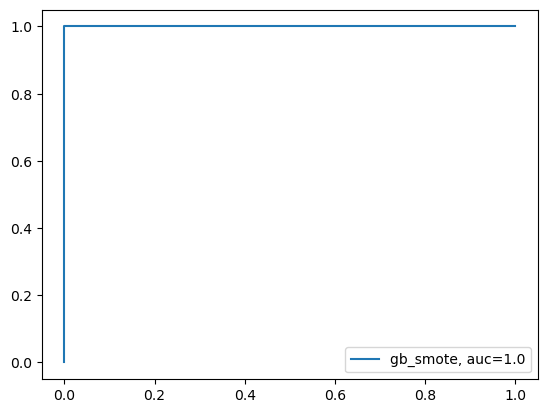

In [130]:
y_pred_proba = gb.predict_proba(X_smote_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_smote_test, y_pred_proba)
auc = metrics.roc_auc_score(y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="gb_smote, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [131]:
conf_matrix=confusion_matrix(y_smote_test,pred_test_gb)
conf_matrix

array([[28,  2],
       [ 0, 29]], dtype=int64)

In [132]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " gb with smote ",
                 'ROC Score' : metrics.roc_auc_score(y_smote_test, pred_test_gb),
                 'Precision Score': metrics.precision_score(y_smote_test, pred_test_gb),
                 'Recall Score': metrics.recall_score(y_smote_test, pred_test_gb),
                 'F1 Score' : metrics.f1_score(y_smote_test, pred_test_gb),
                 'Accuracy Score': metrics.accuracy_score(y_smote_test, pred_test_gb)})

model_gbsmote_report = model_report.append(tmp1, ignore_index = True)
model_gbsmote_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,gb with smote,0.966667,0.935484,1.0,0.966667,0.966102


In [133]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [134]:
print("Train Accuracy :", xgb.score(X_train_scaled,y_train))
print("Test Accuracy :", xgb.score(X_test_scaled,y_test))

Train Accuracy : 1.0
Test Accuracy : 0.9487179487179487


In [135]:
pred_train_xgb= xgb.predict(X_train_scaled)
pred_test_xgb=xgb.predict(X_test_scaled)

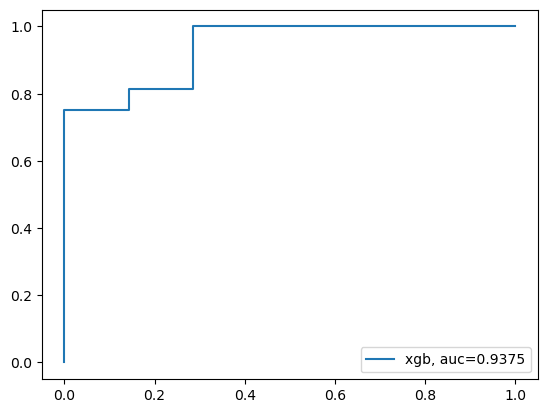

In [136]:
y_pred_proba = xgb.predict_proba(X_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgb, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [137]:
conf_matrix=confusion_matrix(y_test,pred_test_xgb)
conf_matrix

array([[ 5,  2],
       [ 0, 32]], dtype=int64)

In [138]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " XGB ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_xgb),
                 'Precision Score': metrics.precision_score(y_test, pred_test_xgb),
                 'Recall Score': metrics.recall_score(y_test, pred_test_xgb),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_xgb),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_xgb)})

model_xgb_report = model_report.append(tmp1, ignore_index = True)
model_xgb_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,XGB,0.857143,0.941176,1.0,0.969697,0.948718


In [139]:
xgb.fit(X_smote_train_scaled,y_smote_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [140]:
print("Train Accuracy :", xgb.score(X_smote_train_scaled,y_smote_train))
print("Test Accuracy :", xgb.score(X_smote_test_scaled,y_smote_test))

Train Accuracy : 1.0
Test Accuracy : 0.9830508474576272


In [141]:
pred_train_xgb= xgb.predict(X_smote_train_scaled)
pred_test_xgb=xgb.predict(X_smote_test_scaled)

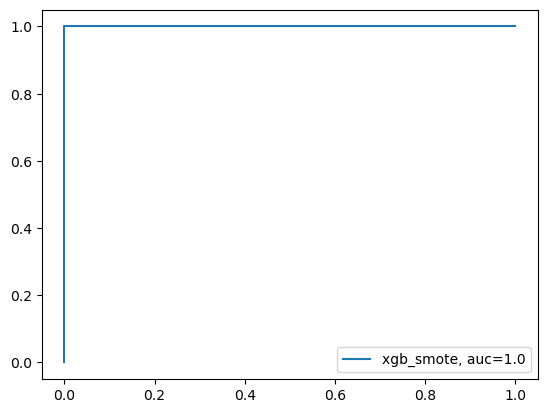

In [142]:
y_pred_proba = xgb.predict_proba(X_smote_test_scaled)[:,1]
fpr, tpr, th = metrics.roc_curve(y_smote_test, y_pred_proba)
auc = metrics.roc_auc_score(y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgb_smote, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [143]:
conf_matrix=confusion_matrix(y_smote_test,pred_test_xgb)
conf_matrix

array([[29,  1],
       [ 0, 29]], dtype=int64)

In [144]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " xgb with smote ",
                 'ROC Score' : metrics.roc_auc_score(y_smote_test, pred_test_xgb),
                 'Precision Score': metrics.precision_score(y_smote_test, pred_test_xgb),
                 'Recall Score': metrics.recall_score(y_smote_test, pred_test_xgb),
                 'F1 Score' : metrics.f1_score(y_smote_test, pred_test_xgb),
                 'Accuracy Score': metrics.accuracy_score(y_smote_test, pred_test_xgb)})

model_xgbsmote_report = model_report.append(tmp1, ignore_index = True)
model_xgbsmote_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,xgb with smote,0.983333,0.966667,1.0,0.983051,0.983051


In [145]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','F1 Score', 'Accuracy Score']
model = pd.DataFrame(columns = cols)
model = model.append([model_logreg_report,model_svc_report,model_dt_report,model_knn_report,model_rf_report,model_bg_report,model_ad_report,model_gb_report,model_xgb_report], ignore_index = True)
model

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logistic Regrerssion,0.714286,0.888889,1.00000,0.941176,0.897436
1,SVC,0.785714,0.914286,1.00000,0.955224,0.923077
2,DT,0.841518,0.939394,0.96875,0.953846,0.923077
3,KNN,0.968750,1.000000,0.93750,0.967742,0.948718
4,RF,0.841518,0.939394,0.96875,0.953846,0.923077
5,BG,0.714286,0.888889,1.00000,0.941176,0.897436
6,AD,0.754464,0.909091,0.93750,0.923077,0.871795
7,GB,0.857143,0.941176,1.00000,0.969697,0.948718
8,XGB,0.857143,0.941176,1.00000,0.969697,0.948718


In [146]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','F1 Score', 'Accuracy Score']
model = pd.DataFrame(columns = cols)
model = model.append([model_logregsmote_report,model_svcsmote_report,model_dtsmote_report,model_knnsmote_report,model_rfsmote_report,model_bgsmote_report,model_adsmote_report,model_gbsmote_report,model_xgbsmote_report], ignore_index = True)
model

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logistic Regrerssion with smote,0.864368,0.862069,0.862069,0.862069,0.864407
1,SVC with smote,1.000000,1.000000,1.000000,1.000000,1.000000
2,dt with smote,1.000000,1.000000,1.000000,1.000000,1.000000
3,knn with smote,0.982759,1.000000,0.965517,0.982456,0.983051
4,rf with smote,0.983333,0.966667,1.000000,0.983051,0.983051
5,bg with smote,0.932759,0.903226,0.965517,0.933333,0.932203
6,ad with smote,0.982759,1.000000,0.965517,0.982456,0.983051
7,gb with smote,0.966667,0.935484,1.000000,0.966667,0.966102
8,xgb with smote,0.983333,0.966667,1.000000,0.983051,0.983051
